**Explorando bases**



    Category                              Item    Serving Size  Calories   
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300  \
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat   
0                120       13.0                         20            5.0  \
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates   
0            

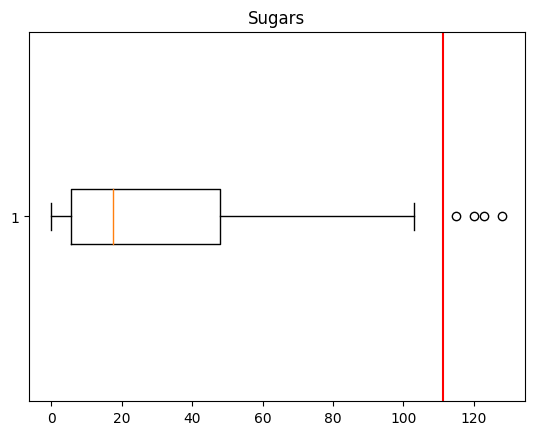

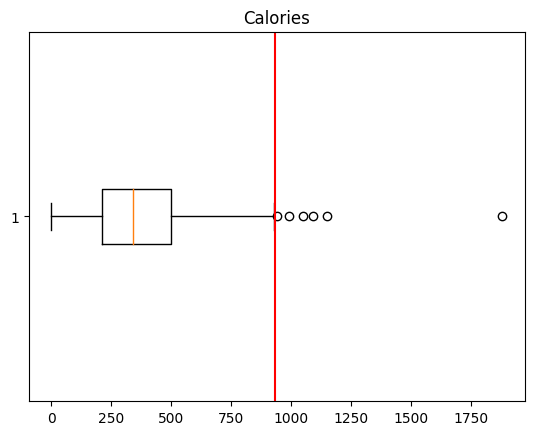

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('/Users/guillermocepeda/C:C++/Implementacion_IA_a01284015/Entregables/Regresion_logistica/mc-donalds-menu-1.csv',sep=',')
print(df.head())

#print columns 
print(df.columns)
#eliminate a column
df = df.drop(['Category'],axis=1) 
print(df.head())
#leave only the column "Sugars" and "calories"
df = df[['Sugars','Calories']]

# 1. Realiza pruebas de normalidad univariada de las variables (selecciona entre los métodos vistos en clase)

s_q1 = np.quantile(df['Sugars'],0.25) #cuartil 1
c_q1 = np.quantile(df['Calories'],0.25)#cuartil 1
s_q3 = np.quantile(df['Sugars'],0.75) #cuartil 3
c_q3 = np.quantile(df['Calories'],0.75)#cuartil 3

#Rango intercuartilico
s_iqr = s_q3 - s_q1
c_iqr = c_q3 - c_q1

#Boxplot horizontal de sugars con límite de datos atípicos o extremos
plt.boxplot(df['Sugars'],vert=False)
#plot a vertical line at the limit of the outliers
plt.axvline(x=s_q3+1.5*s_iqr,color='red')
plt.title('Sugars')
plt.show()
#Boxplot horizontal de calories con límite de datos atípicos o extremos
plt.boxplot(df['Calories'],vert=False)
plt.axvline(x=c_q3+1.5*c_iqr,color='red')
plt.title('Calories')
plt.show()

#Quitar los datos atípicos después de haber graficado los boxplots

s_lim = s_q3 + 1.5*s_iqr
c_lim = c_q3 + 1.5*c_iqr
df = df[df['Sugars']<s_lim]
df = df[df['Calories']<c_lim]



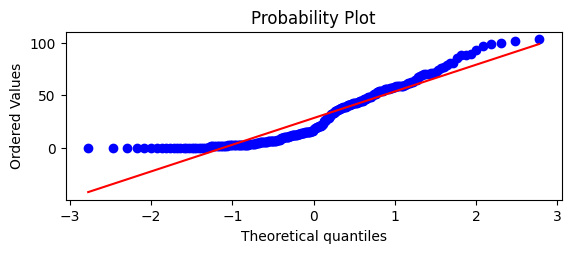

In [3]:
# 2. Grafica los datos y su respectivo QQPlot: qqnorm(datos) y qqline(datos) para cada variable
#QQplot de sugars
plt.subplot(2,1,1)
plt.title('QQplot Sugars')
stats.probplot(df['Sugars'],dist='norm',plot=plt)
plt.show()


In [4]:


# Calcula el coeficiente de sesgo y el coeficiente de curtosis de cada variable.

sesgo_sugars = df['Sugars'].skew()
sesgo_calories = df['Calories'].skew()
curtosis_sugars = df['Sugars'].kurtosis()
curtosis_calories = df['Calories'].kurtosis()

print("Sesgo de sugars: ",sesgo_sugars)
print("Sesgo de calories: ",sesgo_calories)
print("Curtosis de sugars: ",curtosis_sugars)
print("Curtosis de calories: ",curtosis_calories)


Sesgo de sugars:  0.7980002703131476
Sesgo de calories:  0.22544161373962351
Curtosis de sugars:  -0.3368579444441888
Curtosis de calories:  -0.476368782403791


In [5]:

# Compara las medidas de media, mediana y rango medio de cada variable.
m_sugars = np.mean(df['Sugars'])
m_calories = np.mean(df['Calories'])
mediana_sugars = np.median(df['Sugars'])
mediana_calories = np.median(df['Calories'])
rm_sugars = np.mean(df['Sugars']) - np.median(df['Sugars'])
rm_calories = np.mean(df['Calories']) - np.median(df['Calories'])
print("Media de sugars: ",m_sugars)
print("Media de calories: ",m_calories)
print("Mediana de sugars: ",mediana_sugars)
print("Mediana de calories: ",mediana_calories)
print("Rango medio de sugars: ",rm_sugars)
print("Rango medio de calories: ",rm_calories)


Media de sugars:  28.376
Media de calories:  340.8
Mediana de sugars:  17.0
Mediana de calories:  330.0
Rango medio de sugars:  11.376000000000001
Rango medio de calories:  10.800000000000011


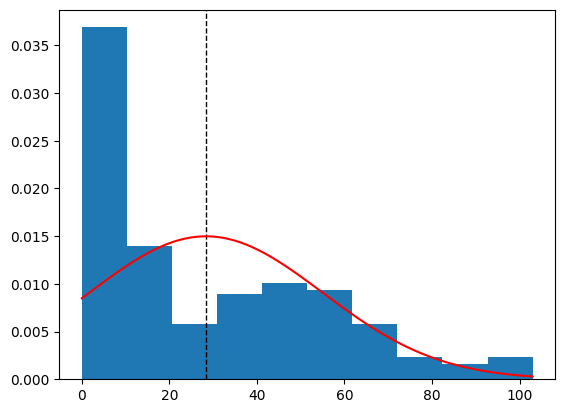

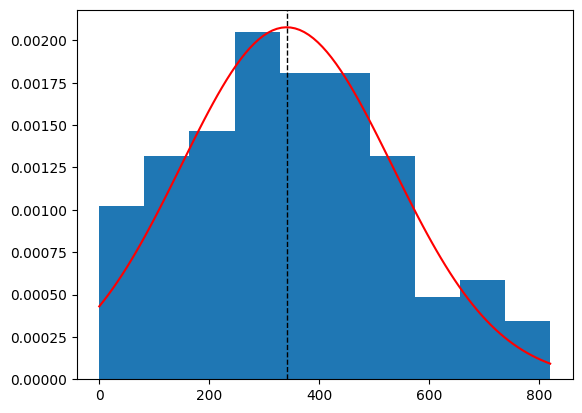

In [7]:
# Realiza el histograma y su distribución teórica de probabilidad (sugerencia, adapta el código:
# hist(datos,freq=FALSE)
# lines(density(datos),col="red")
# curve(dnorm(x,mean=mean(datos,sd=sd(datos)), from=-6, to=6, add=TRUE, col="blue",lwd=2)
# Comenta los gráficos y los resultados obtenidos con vías a interpretar normalidad de los datos

plt.hist(df['Sugars'],density=True)
plt.axvline(df['Sugars'].mean(), color='k', linestyle='dashed', linewidth=1)
#curva dnorm
x = np.linspace(df['Sugars'].min(),df['Sugars'].max(),100)
mean = df['Sugars'].mean()
sd = df['Sugars'].std()
y = 1/(sd*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*sd**2))
plt.plot(x,y,color='red')
plt.show()


plt.hist(df['Calories'],density=True)
plt.axvline(df['Calories'].mean(), color='k', linestyle='dashed', linewidth=1)
#curva dnorm
x = np.linspace(df['Calories'].min(),df['Calories'].max(),100)
mean = df['Calories'].mean()
sd = df['Calories'].std()
y = 1/(sd*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*sd**2))
plt.plot(x,y,color='red')
plt.show() 

#Se puede apreciar claramente que la distribución normal se ajusta mejor a la variable Calories,
# mientras que la variable Sugars pareciera que tiene un sesgo a la izquierda

In [ ]:
for 